<div class="alert alert-block alert-success">
    
    
## <center> Descriptive Statistics </center>
### <center> Exploratory Data Analysis</center>


<br>
    
</div>

In [1]:
import pandas as pd

import datetime
from datetime import datetime, date, timedelta
import time
from math import isnan
import numpy as np

import plotly
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px



In [2]:
import numpy
print(numpy.__version__)

1.19.1




<div class="alert alert-info">

  
    
## Load and Preprocess the data
- Count how many total deliveries
- Count how many deliveries per Zip Code
- Total number of Orders 
- Total number of Orders per Zip Code
- Total Number of Products ordered per Zip Code
- Total Number of Orders for every Product in every Zip Code per Month

</div>
    
    
    


In [3]:
df2=pd.read_csv('D:\waseb\Downloads\onmartloc.csv')
df2

Zip      City State   Latitude  Longitude  \
0    60651   Chicago    IL  41.901485  -87.74055   
1    60697   Chicago    IL  41.811929  -87.68732   
2    60667   Chicago    IL  41.811929  -87.68732   
3    60694   Chicago    IL  41.811929  -87.68732   
4    60684   Chicago    IL  41.811929  -87.68732   
..     ...       ...   ...        ...        ...   
780  30305   Atlanta    GA  33.830054  -84.38472   
781  28511  Atlantic    NC  34.887266  -76.33033   
782  16111  Atlantic    PA  41.518256  -80.28340   
783  50022  Atlantic    IA  41.410484  -95.00852   
784  23303  Atlantic    VA  37.892445  -75.51107   

    Facility_ID at given Location/Zip             distcenter     warehouse  \
0                         Warehouse_1   DistributionCenter_1   Warehouse_1   
1                                 NaN   DistributionCenter_1   Warehouse_1   
2                                 NaN   DistributionCenter_1   Warehouse_1   
3                                 NaN   DistributionCenter_1   Warehouse_1   
4                                 NaN   DistributionCenter_1   Warehouse_1   
..                                ...                    ...           ...   
780             DistributionCenter_97  DistributionCenter_97  Warehouse_17   
781                               NaN  DistributionCenter_97  Warehouse_17   
782                               NaN  DistributionCenter_97  Warehouse_17   
783                               NaN  DistributionCenter_97  Warehouse_17   
784                               NaN  DistributionCenter_97  Warehouse_17   

     Total_Orders_Shipped  Total_Orders_Returned  \
0                       0                      0   
1                       0                      0   
2                       0                      0   
3                       0                      0   
4                       0                      0   
..                    ...                    ...   
780                     0                      0   
781                     0                      0   
782                     0                      0   
783                     0                      0   
784                     0                      0   

     Total_Orders_Delayed_Delivery  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  
..                             ...  
780                              0  
781                              0  
782                              0  
783                              0  
784                              0  

[785 rows x 11 columns]

In [4]:
df2['warehouse']

0       Warehouse_1
1       Warehouse_1
2       Warehouse_1
3       Warehouse_1
4       Warehouse_1
           ...     
780    Warehouse_17
781    Warehouse_17
782    Warehouse_17
783    Warehouse_17
784    Warehouse_17
Name: warehouse, Length: 785, dtype: object

In [5]:
df = pd.read_csv('D:\waseb\Downloads\Transactions.csv')
df = df.dropna()
df['Delivery_Zip_Code'] = df['Delivery_Zip_Code'].astype(int)
df.head()

CustomerID FirstName  LastName     CreditCardNumber  \
0  566-26-0321    Rebeka    Stokes  xxxx-xxxx-xxxx-2650   
1  274-18-0017   Rahsaan      Koch  xxxx-xxxx-xxxx-5055   
2  455-28-7950      Zion   Osinski  xxxx-xxxx-xxxx-0150   
3  254-72-5938      Ward    Brekke  xxxx-xxxx-xxxx-5280   
4  563-47-8401  Terrence  Franecki  xxxx-xxxx-xxxx-1019   

                                OrderID Customer_Occupation  \
0  50787284-d78d-4b6a-b93f-7419b0d46590              Lawyer   
1  f61639d7-28de-4507-a63a-71e99921d8f9              Lawyer   
2  7b1caf69-bd5b-441c-9115-6fa31ba1c313              Lawyer   
3  cb58e8e9-572b-4d9e-af9f-dbecf9dfd3c5               Actor   
4  a9d66460-a48f-419f-8d39-7818290a3041               Actor   

   Credit_Card_Number  Order_ID  Order_Date Expected_Delivery_Date  ...  \
0         12345789032        98    4/7/2020              4/11/2020  ...   
1         12345789032       131   5/10/2020              5/14/2020  ...   
2         12345789032       318  11/13/2020             11/17/2020  ...   
3         12345789032       528   2/12/2020              2/16/2020  ...   
4         12345789032       561   2/12/2020              2/16/2020  ...   

   Product_Name Category  Manufacturer Review_Rating Delivery_Tracking_ID  \
0  Fitbit small  fitness  Fitbit small             3                   98   
1  Fitbit small  fitness  Fitbit small             3                  131   
2  Fitbit small  fitness  Fitbit small             3                  318   
3  Fitbit large  fitness  Fitbit large             5                  528   
4  Fitbit large  fitness  Fitbit large             5                  561   

   Delivery_Type  Delivery_Zip_Code Transaction_Status  Order_Returned  \
0         Pickup              10048           Disputed               1   
1         Pickup              10048           Disputed               1   
2         Pickup              10048           Disputed               1   
3         Pickup              10048           Disputed               0   
4         Pickup              10048           Disputed               0   

  Order_Delivered_on_Time  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  

[5 rows x 22 columns]

In [6]:
df['Order_ID'].count()

16372

In [7]:
df['Expected_Delivery_Date'] = pd.to_datetime(df['Expected_Delivery_Date'])
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Actual_Delivery_Date'] = pd.to_datetime(df['Actual_Delivery_Date'])
df.set_index('Actual_Delivery_Date', inplace=True)
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['week_of_year'] = df.index.weekofyear

C:\Users\waseb\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [8]:
df.dtypes

CustomerID                         object
FirstName                          object
LastName                           object
CreditCardNumber                   object
OrderID                            object
Customer_Occupation                object
Credit_Card_Number                  int64
Order_ID                            int64
Order_Date                 datetime64[ns]
Expected_Delivery_Date     datetime64[ns]
Product_ID                         object
Product_Name                       object
Category                           object
Manufacturer                       object
Review_Rating                       int64
Delivery_Tracking_ID                int64
Delivery_Type                      object
Delivery_Zip_Code                   int32
Transaction_Status                 object
Order_Returned                      int64
Order_Delivered_on_Time             int64
year                                int64
month                               int64
day                               

In [9]:
df.head()

CustomerID FirstName  LastName     CreditCardNumber  \
Actual_Delivery_Date                                                         
2020-04-15            566-26-0321    Rebeka    Stokes  xxxx-xxxx-xxxx-2650   
2020-05-18            274-18-0017   Rahsaan      Koch  xxxx-xxxx-xxxx-5055   
2020-11-21            455-28-7950      Zion   Osinski  xxxx-xxxx-xxxx-0150   
2020-02-20            254-72-5938      Ward    Brekke  xxxx-xxxx-xxxx-5280   
2020-02-20            563-47-8401  Terrence  Franecki  xxxx-xxxx-xxxx-1019   

                                                   OrderID  \
Actual_Delivery_Date                                         
2020-04-15            50787284-d78d-4b6a-b93f-7419b0d46590   
2020-05-18            f61639d7-28de-4507-a63a-71e99921d8f9   
2020-11-21            7b1caf69-bd5b-441c-9115-6fa31ba1c313   
2020-02-20            cb58e8e9-572b-4d9e-af9f-dbecf9dfd3c5   
2020-02-20            a9d66460-a48f-419f-8d39-7818290a3041   

                     Customer_Occupation  Credit_Card_Number  Order_ID  \
Actual_Delivery_Date                                                     
2020-04-15                        Lawyer         12345789032        98   
2020-05-18                        Lawyer         12345789032       131   
2020-11-21                        Lawyer         12345789032       318   
2020-02-20                         Actor         12345789032       528   
2020-02-20                         Actor         12345789032       561   

                     Order_Date Expected_Delivery_Date  ...  \
Actual_Delivery_Date                                    ...   
2020-04-15           2020-04-07             2020-04-11  ...   
2020-05-18           2020-05-10             2020-05-14  ...   
2020-11-21           2020-11-13             2020-11-17  ...   
2020-02-20           2020-02-12             2020-02-16  ...   
2020-02-20           2020-02-12             2020-02-16  ...   

                     Delivery_Tracking_ID Delivery_Type Delivery_Zip_Code  \
Actual_Delivery_Date                                                        
2020-04-15                             98        Pickup             10048   
2020-05-18                            131        Pickup             10048   
2020-11-21                            318        Pickup             10048   
2020-02-20                            528        Pickup             10048   
2020-02-20                            561        Pickup             10048   

                     Transaction_Status  Order_Returned  \
Actual_Delivery_Date                                      
2020-04-15                     Disputed               1   
2020-05-18                     Disputed               1   
2020-11-21                     Disputed               1   
2020-02-20                     Disputed               0   
2020-02-20                     Disputed               0   

                      Order_Delivered_on_Time  year  month day  week_of_year  
Actual_Delivery_Date                                                          
2020-04-15                                  1  2020      4  15            16  
2020-05-18                                  1  2020      5  18            21  
2020-11-21                                  1  2020     11  21            47  
2020-02-20                                  1  2020      2  20             8  
2020-02-20                                  1  2020      2  20             8  

[5 rows x 25 columns]





<div class="alert alert-info">

  
    
## Descriptive Analytics


</div>
    

In [10]:
df.groupby(['Product_Name'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_product')

Product_Name  Total_orders_per_product
0           Bose                       910
1   Fitbit large                      2903
2   Fitbit small                      2904
3  Harman Kardon                      1445
4            JBL                       910
5       Logitech                      1525
6          Redmi                       910
7    Samsung s10                       910
8           Sony                      2435
9            VR7                      1520

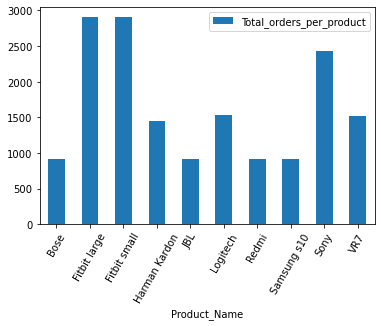

In [11]:
ax = df.groupby(['Product_Name'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_product').plot.bar(x='Product_Name', y='Total_orders_per_product', rot=60)





<div class="alert alert-info">

  
    
## Deliveries/Orders per  Zip Code Distribution


</div>
    


In [12]:
df.groupby(['Delivery_Zip_Code'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_zipcode')

Delivery_Zip_Code  Total_orders_per_zipcode
0               10048                       413
1               10110                       394
2               10121                       391
3               10123                       439
4               10168                       416
..                ...                       ...
57              90076                       369
58              90077                       292
59              90080                       301
60              90097                       395
61              90774                       388

[62 rows x 2 columns]

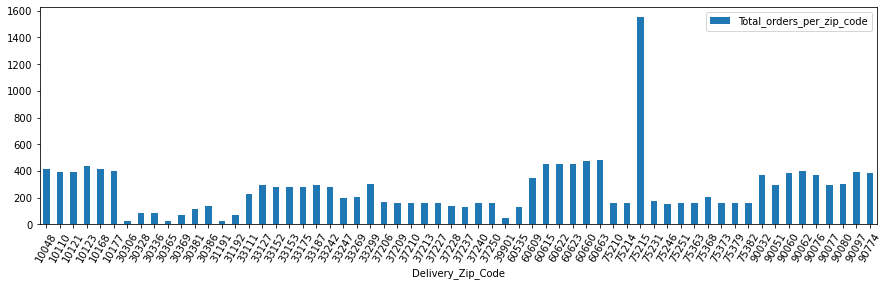

In [13]:
ax1 = df.groupby(['Delivery_Zip_Code'])['Expected_Delivery_Date'].count().reset_index(name ='Total_orders_per_zip_code').plot.bar(x='Delivery_Zip_Code', y='Total_orders_per_zip_code', rot=60, figsize=(15, 4))


In [14]:
Categories = df['Category'].unique()
Categories

array(['fitness', 'phone', 'speaker', 'tv', 'vr'], dtype=object)

In [15]:
Zips = df['Delivery_Zip_Code'].unique()
Zips

array([10048, 10110, 10121, 10123, 10168, 10177, 30306, 30328, 30336,
       30365, 30369, 30381, 30386, 31191, 31192, 33111, 33127, 33152,
       33153, 33175, 33187, 33242, 33247, 33269, 33299, 37206, 37209,
       37210, 37213, 37227, 37228, 37237, 37240, 37250, 39901, 60609,
       60535, 60615, 60622, 60623, 60660, 60663, 75210, 75214, 75215,
       75231, 75246, 75251, 75363, 75368, 75373, 75379, 75382, 90032,
       90051, 90060, 90062, 90076, 90077, 90080, 90097, 90774])

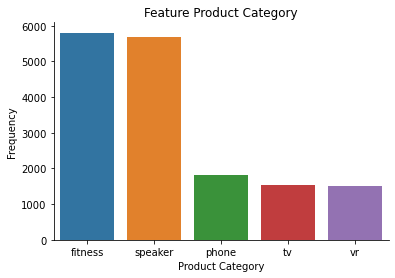

In [16]:
sort_X1 = df.groupby('Category').size()\
                    .sort_values(ascending=False)\
                    .index
#plt.figure(figsize=(12,6))
sns.countplot(x='Category', data=df, order = sort_X1)
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Feature Product Category')
sns.despine();

In [17]:
df_bx = pd.DataFrame({'count' : df.groupby( [ "Category", "Delivery_Zip_Code"] ).size()}).reset_index()


df_bx[1:303]

Category  Delivery_Zip_Code  count
1    fitness              10110    139
2    fitness              10121    137
3    fitness              10123    154
4    fitness              10168    147
5    fitness              10177    148
..       ...                ...    ...
298       vr              90060     38
299       vr              90062     41
300       vr              90076     40
301       vr              90077     27
302       vr              90080     23

[302 rows x 3 columns]

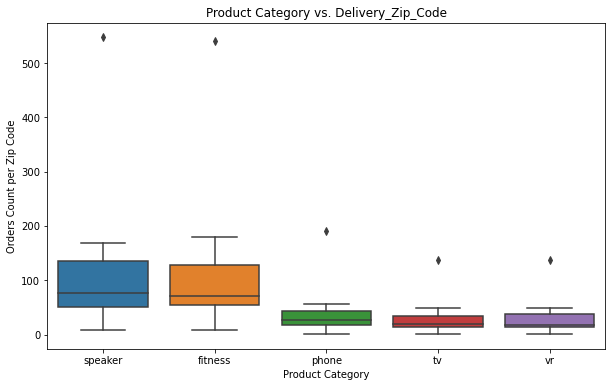

In [18]:
sort_y = df_bx.groupby('Category')['count']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize = (10, 6))

sns.boxplot(y='count', x='Category', data=df_bx, order=sort_y)

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels())
plt.xlabel('Product Category')
plt.ylabel('Orders Count per Zip Code')
plt.title('Product Category vs. Delivery_Zip_Code')
plt.show();



<div class="alert alert-info">

  
    
## Time Series Forecasting

</div>



In [19]:
slice_for_zip_code = df.loc[df['Delivery_Zip_Code'] == 60535]

In [20]:
df_deliveries_count = slice_for_zip_code.groupby(['Expected_Delivery_Date'])['Order_ID'].count().reset_index(name ='Total_Number_of_orders')
df_deliveries_count

Expected_Delivery_Date  Total_Number_of_orders
0               2018-01-10                       1
1               2018-01-16                       1
2               2018-01-18                       2
3               2018-01-31                       1
4               2018-02-05                       1
..                     ...                     ...
107             2020-11-11                       1
108             2020-11-18                       1
109             2020-11-26                       1
110             2020-11-29                       1
111             2020-12-19                       1

[112 rows x 2 columns]


<div class="alert alert-info">

  
    
## Distribution of Products Bought in Zip Codes


</div>






In [21]:
bins_dt = pd.date_range('2018-01-01', freq='6MS', periods=8)
bins_str = bins_dt.astype(str).values

labels = ['(2018-01-01, 2018-06-31)',
          '(2018-07-01, 2018-12-31)',
          '(2019-01-01, 2019-06-31)',
          '(2019-07-01, 2019-12-31)',
          '(2020-01-01, 2020-06-31)',
          '(2020-07-01, 2020-12-31)',
          '(2021-01-01, 2021-06-31)']
df_6_months_bins = df.groupby(['Expected_Delivery_Date'
                   ,'Product_Name'
                   ,'Delivery_Zip_Code'])['Order_ID'].count().reset_index(name ='Total_Number_of_orders')

df_6_months_bins['bins'] = pd.cut(df_6_months_bins['Expected_Delivery_Date'].astype(np.int64)//10**9,
                   bins=bins_dt.astype(np.int64)//10**9,
                   labels=labels)

In [22]:
df_6_months_bins

Expected_Delivery_Date Product_Name  Delivery_Zip_Code  \
0                 2018-01-05     Logitech              33242   
1                 2018-01-05     Logitech              60622   
2                 2018-01-05     Logitech              75215   
3                 2018-01-05     Logitech              90062   
4                 2018-01-05        Redmi              37210   
...                      ...          ...                ...   
12102             2021-01-04  Samsung s10              10123   
12103             2021-01-04  Samsung s10              33127   
12104             2021-01-04  Samsung s10              75210   
12105             2021-01-04  Samsung s10              75214   
12106             2021-01-04  Samsung s10              75215   

       Total_Number_of_orders                      bins  
0                           2  (2018-01-01, 2018-06-31)  
1                           1  (2018-01-01, 2018-06-31)  
2                           1  (2018-01-01, 2018-06-31)  
3                           1  (2018-01-01, 2018-06-31)  
4                           1  (2018-01-01, 2018-06-31)  
...                       ...                       ...  
12102                       1  (2021-01-01, 2021-06-31)  
12103                       1  (2021-01-01, 2021-06-31)  
12104                       1  (2021-01-01, 2021-06-31)  
12105                       1  (2021-01-01, 2021-06-31)  
12106                       1  (2021-01-01, 2021-06-31)  

[12107 rows x 5 columns]

In [23]:
grouped_bin_df = df_6_months_bins.groupby(['bins','Product_Name','Delivery_Zip_Code'])['Total_Number_of_orders'].sum().reset_index(name ='Total_Number_of_orders')
grouped_bin_df['Total_Number_of_orders'] = grouped_bin_df['Total_Number_of_orders'].fillna(0)
grouped_bin_df.head(10)

bins Product_Name  Delivery_Zip_Code  \
0  (2018-01-01, 2018-06-31)         Bose              10048   
1  (2018-01-01, 2018-06-31)         Bose              10110   
2  (2018-01-01, 2018-06-31)         Bose              10121   
3  (2018-01-01, 2018-06-31)         Bose              10123   
4  (2018-01-01, 2018-06-31)         Bose              10168   
5  (2018-01-01, 2018-06-31)         Bose              10177   
6  (2018-01-01, 2018-06-31)         Bose              30306   
7  (2018-01-01, 2018-06-31)         Bose              30328   
8  (2018-01-01, 2018-06-31)         Bose              30336   
9  (2018-01-01, 2018-06-31)         Bose              30365   

   Total_Number_of_orders  
0                       2  
1                       2  
2                       1  
3                       2  
4                       4  
5                       0  
6                       0  
7                       0  
8                       2  
9                       0


<div class="alert alert-info">

  
    
## Lets filter total orders for specific list of Zip Codes

- List of Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]


</div>


In [24]:
zip_codes = [60623, 60663, 60609, 60660, 60615, 60622]
grouped_bin_df = grouped_bin_df[grouped_bin_df.Delivery_Zip_Code.isin(zip_codes)]
grouped_bin_df

bins Product_Name  Delivery_Zip_Code  \
36    (2018-01-01, 2018-06-31)         Bose              60609   
37    (2018-01-01, 2018-06-31)         Bose              60615   
38    (2018-01-01, 2018-06-31)         Bose              60622   
39    (2018-01-01, 2018-06-31)         Bose              60623   
40    (2018-01-01, 2018-06-31)         Bose              60660   
...                        ...          ...                ...   
4315  (2021-01-01, 2021-06-31)          VR7              60615   
4316  (2021-01-01, 2021-06-31)          VR7              60622   
4317  (2021-01-01, 2021-06-31)          VR7              60623   
4318  (2021-01-01, 2021-06-31)          VR7              60660   
4319  (2021-01-01, 2021-06-31)          VR7              60663   

      Total_Number_of_orders  
36                         6  
37                         2  
38                         8  
39                         3  
40                         7  
...                      ...  
4315                       0  
4316                       0  
4317                       0  
4318                       0  
4319                       0  

[420 rows x 4 columns]

C:\Users\waseb\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


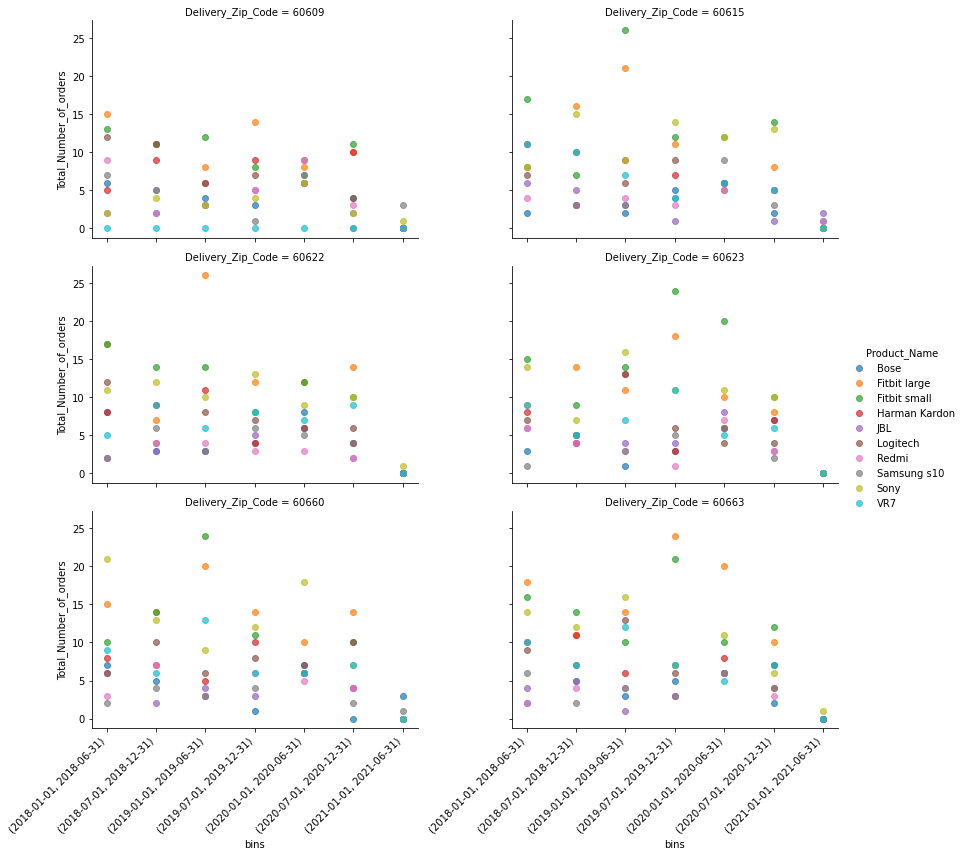

In [25]:
g = sns.FacetGrid(grouped_bin_df, col="Delivery_Zip_Code", hue="Product_Name", margin_titles=True, col_wrap=2, height=4, aspect=1.5)
g.map(plt.scatter, 'bins', 'Total_Number_of_orders', alpha=.7)
ha = ['right', 'center', 'left']
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha=ha[0])
plt.tight_layout(h_pad=1)
g.add_legend();





<div class="alert alert-info">

  
    
## Total number of Orders per Month
- for selected Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]



</div>


In [26]:
monthly_df = df.groupby(['month',
                         'Delivery_Zip_Code'])['OrderID'].count().reset_index(name ='Total_Number_of_orders_per_month')
monthly_df = monthly_df[monthly_df.Delivery_Zip_Code.isin(zip_codes)]
monthly_df

month  Delivery_Zip_Code  Total_Number_of_orders_per_month
36       1              60609                                45
37       1              60615                                59
38       1              60622                                54
39       1              60623                                68
40       1              60660                                66
..     ...                ...                               ...
714     12              60615                                39
715     12              60622                                36
716     12              60623                                32
717     12              60660                                41
718     12              60663                                40

[72 rows x 3 columns]

In [27]:
monthly_df_products = df.groupby(['month',
                         'Product_Name',
                         'Delivery_Zip_Code'])['OrderID'].count().reset_index(name ='Total_Number_of_orders_per_month')
monthly_df_products = monthly_df_products[monthly_df_products.Delivery_Zip_Code.isin(zip_codes)]
monthly_df_products

month Product_Name  Delivery_Zip_Code  Total_Number_of_orders_per_month
21        1         Bose              60609                                 4
22        1         Bose              60615                                 4
23        1         Bose              60622                                 4
24        1         Bose              60623                                 2
25        1         Bose              60660                                 6
...     ...          ...                ...                               ...
4973     12          VR7              60615                                 2
4974     12          VR7              60622                                 4
4975     12          VR7              60623                                 4
4976     12          VR7              60660                                 2
4977     12          VR7              60663                                 5

[639 rows x 4 columns]




<div class="alert alert-info">

  
    
## Total number of Orders  per Zip Code per Month
- for selected Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]



</div>


C:\Users\waseb\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


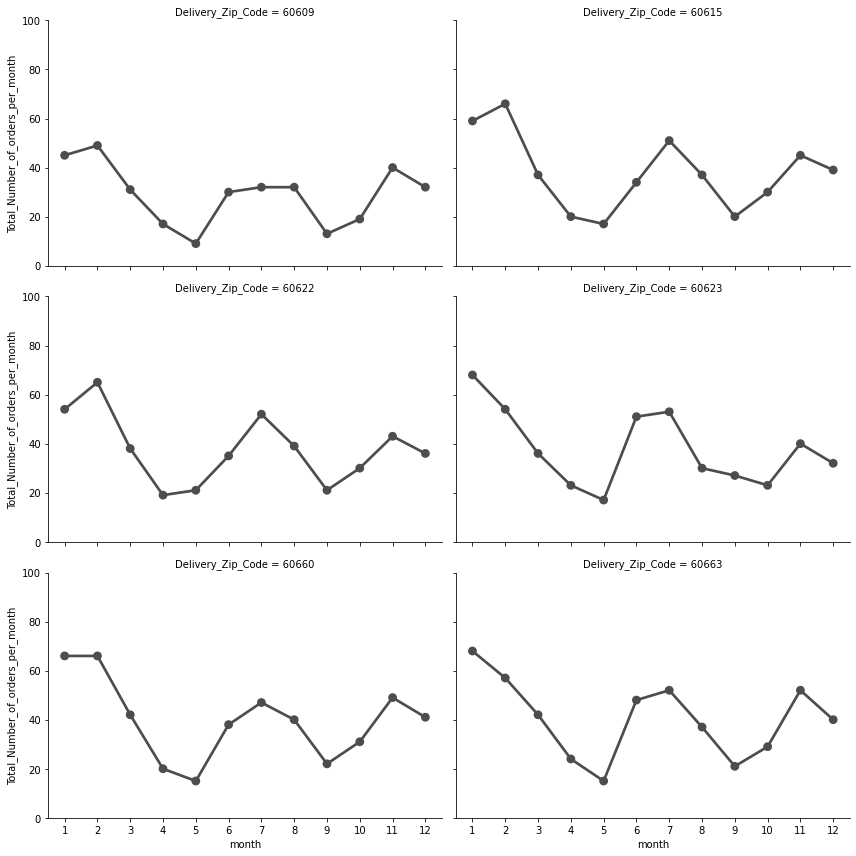

In [28]:
g = sns.FacetGrid(monthly_df, col="Delivery_Zip_Code", col_wrap=2,  ylim=(0, 100), height=4, aspect=1.5)
g.map(sns.pointplot, "month", "Total_Number_of_orders_per_month", color=".3", ci=None);





<div class="alert alert-info">

  
    
## Total Number of Orders per Product per Zip Code per Month:
- for selected Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]





</div>

C:\Users\waseb\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


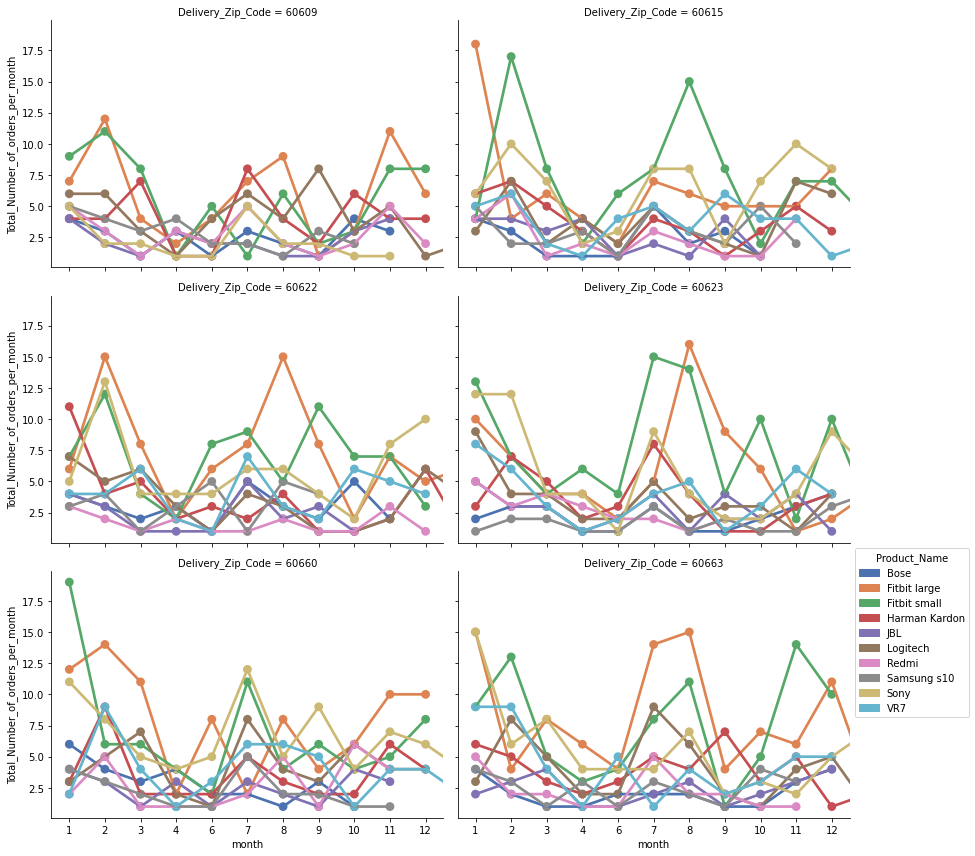

In [29]:
from matplotlib import patches
g = sns.FacetGrid(monthly_df_products, col="Delivery_Zip_Code", 
                  hue="Product_Name",
                  margin_titles=True, 
                  col_wrap=2, palette="deep", 
                  height=4, aspect=1.5)

g.map(sns.pointplot, "month", "Total_Number_of_orders_per_month", ci=None)  # 
labels = ["Bose","Fitbit large","Fitbit small","Harman Kardon","JBL","Logitech","Redmi","Samsung s10","Sony","VR7"] #hue_order
colors = sns.color_palette("deep").as_hex()[:len(labels)]
handles=[patches.Patch(color=col,label=lab) for col,lab in zip(colors,labels)]
plt.legend(handles=handles,title='Product_Name',loc='center left',bbox_to_anchor=(1,0.75));

In [30]:
fig = px.line(df_deliveries_count, x='Expected_Delivery_Date', y='Total_Number_of_orders')
fig.update_layout(title_text='Time Series of daily order counts for all users for zip code: 60535')
fig.show()



<div class="alert alert-success">

# Forecasting
    
## Here we only use simple methods such as calculating the simple average of daily  , weekly, and monthly sales for each warehouse

    

</div>

### Daily Cleaning and Merging

In [31]:
# Merging Warehouse data with Transactions data 
df2=pd.read_csv('D:\waseb\Downloads\onmartloc.csv')
df2
df=df.rename({'Delivery_Zip_Code' : 'Zip'}, axis=1)
df3=df2[['Zip','distcenter','warehouse']]
d4 = pd.merge(df, df3, on=['Zip'])

In [32]:
d4.head()

CustomerID FirstName  LastName     CreditCardNumber  \
0  566-26-0321    Rebeka    Stokes  xxxx-xxxx-xxxx-2650   
1  274-18-0017   Rahsaan      Koch  xxxx-xxxx-xxxx-5055   
2  455-28-7950      Zion   Osinski  xxxx-xxxx-xxxx-0150   
3  254-72-5938      Ward    Brekke  xxxx-xxxx-xxxx-5280   
4  563-47-8401  Terrence  Franecki  xxxx-xxxx-xxxx-1019   

                                OrderID Customer_Occupation  \
0  50787284-d78d-4b6a-b93f-7419b0d46590              Lawyer   
1  f61639d7-28de-4507-a63a-71e99921d8f9              Lawyer   
2  7b1caf69-bd5b-441c-9115-6fa31ba1c313              Lawyer   
3  cb58e8e9-572b-4d9e-af9f-dbecf9dfd3c5               Actor   
4  a9d66460-a48f-419f-8d39-7818290a3041               Actor   

   Credit_Card_Number  Order_ID Order_Date Expected_Delivery_Date  ...    Zip  \
0         12345789032        98 2020-04-07             2020-04-11  ...  10048   
1         12345789032       131 2020-05-10             2020-05-14  ...  10048   
2         12345789032       318 2020-11-13             2020-11-17  ...  10048   
3         12345789032       528 2020-02-12             2020-02-16  ...  10048   
4         12345789032       561 2020-02-12             2020-02-16  ...  10048   

  Transaction_Status Order_Returned Order_Delivered_on_Time  year  month day  \
0           Disputed              1                       1  2020      4  15   
1           Disputed              1                       1  2020      5  18   
2           Disputed              1                       1  2020     11  21   
3           Disputed              0                       1  2020      2  20   
4           Disputed              0                       1  2020      2  20   

   week_of_year             distcenter    warehouse  
0            16  DistributionCenter_13  Warehouse_4  
1            21  DistributionCenter_13  Warehouse_4  
2            47  DistributionCenter_13  Warehouse_4  
3             8  DistributionCenter_13  Warehouse_4  
4             8  DistributionCenter_13  Warehouse_4  

[5 rows x 27 columns]

In [33]:
uniquedist= d4['distcenter'].unique()
uniquedist

array(['DistributionCenter_13', 'DistributionCenter_14',
       'DistributionCenter_93', 'DistributionCenter_51',
       'DistributionCenter_50', 'DistributionCenter_85',
       'DistributionCenter_86', 'DistributionCenter_84',
       'DistributionCenter_2', 'DistributionCenter_66',
       'DistributionCenter_65', 'DistributionCenter_38',
       'DistributionCenter_37'], dtype=object)

In [34]:
uniqueware= d4['warehouse'].unique()
uniqueware

array(['Warehouse_4', 'Warehouse_5', 'Warehouse_17', 'Warehouse_16',
       'Warehouse_15', 'Warehouse_2', 'Warehouse_3', 'Warehouse_1',
       'Warehouse_19', 'Warehouse_18', 'Warehouse_13', 'Warehouse_12'],
      dtype=object)

In [35]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16240
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CustomerID               16241 non-null  object        
 1   FirstName                16241 non-null  object        
 2   LastName                 16241 non-null  object        
 3   CreditCardNumber         16241 non-null  object        
 4   OrderID                  16241 non-null  object        
 5   Customer_Occupation      16241 non-null  object        
 6   Credit_Card_Number       16241 non-null  int64         
 7   Order_ID                 16241 non-null  int64         
 8   Order_Date               16241 non-null  datetime64[ns]
 9   Expected_Delivery_Date   16241 non-null  datetime64[ns]
 10  Product_ID               16241 non-null  object        
 11  Product_Name             16241 non-null  object        
 12  Category                 16241 n

In [36]:
df5=d4[d4["Order_Returned"]==1]

In [37]:
df5['Order_Date'] = pd.to_datetime(df5['Order_Date'])

C:\Users\waseb\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
#Our dates span 2 years
print(df5['Order_Date'].max())
print(df5['Order_Date'].min())

2020-12-31 00:00:00
2018-01-01 00:00:00


In [39]:
#total orders per warehouse
warehouse_counts=d4['warehouse'].value_counts()
warehouse_counts

Warehouse_1     2673
Warehouse_18    2414
Warehouse_4     2053
Warehouse_16    2048
Warehouse_12    1937
Warehouse_13    1252
Warehouse_2      965
Warehouse_19     788
Warehouse_17     685
Warehouse_15     598
Warehouse_3      429
Warehouse_5      399
Name: warehouse, dtype: int64

In [40]:
#On average, what % of orders are returned(per day)
d4.groupby(['warehouse','day'])['Order_Returned'].mean()

warehouse    day
Warehouse_1  1      0.333333
             2      0.566667
             3      0.378641
             4      0.441860
             5      0.336735
                      ...   
Warehouse_5  27     0.714286
             28     0.272727
             29     0.631579
             30     0.200000
             31     0.714286
Name: Order_Returned, Length: 372, dtype: float64

In [41]:
#On average,what % of orders are returned(per month)
d4.groupby(['warehouse','month'])['Order_Returned'].mean()

warehouse    month
Warehouse_1  1        0.441667
             2        0.450980
             3        0.429204
             4        0.463415
             5        0.500000
                        ...   
Warehouse_5  8        0.481481
             9        0.368421
             10       0.566667
             11       0.531250
             12       0.205882
Name: Order_Returned, Length: 144, dtype: float64

In [42]:
#On average,what % of orders are returned(week)
d4.groupby(['warehouse','week_of_year'])['Order_Returned'].mean()

warehouse    week_of_year
Warehouse_1  1               0.475410
             2               0.322034
             3               0.492754
             4               0.451613
             5               0.428571
                               ...   
Warehouse_5  49              0.000000
             50              0.285714
             51              0.000000
             52              0.250000
             53              0.333333
Name: Order_Returned, Length: 624, dtype: float64

### Looking For Seasonal Trends

In [43]:
Returned_Per_Day = df5.groupby(['Order_Date',
                         'warehouse'])['Order_Returned'].count().reset_index(name ='Total Returned Per Day')
Returned_Per_Day

Order_Date     warehouse  Total Returned Per Day
0    2018-01-01  Warehouse_12                       1
1    2018-01-01  Warehouse_13                       1
2    2018-01-01  Warehouse_18                       1
3    2018-01-01  Warehouse_19                       1
4    2018-01-01   Warehouse_3                       1
...         ...           ...                     ...
3443 2020-12-31  Warehouse_15                       1
3444 2020-12-31  Warehouse_17                       1
3445 2020-12-31  Warehouse_18                       1
3446 2020-12-31  Warehouse_19                       2
3447 2020-12-31   Warehouse_4                       1

[3448 rows x 3 columns]

In [44]:
Returned_Per_Day = df5.groupby(['day',
                         'warehouse'])['Order_Returned'].count().reset_index(name ='Total Returned Per Day')
Returned_Per_Day

day     warehouse  Total Returned Per Day
0      1   Warehouse_1                      29
1      1  Warehouse_12                      20
2      1  Warehouse_13                      26
3      1  Warehouse_15                       4
4      1  Warehouse_16                      24
..   ...           ...                     ...
366   31  Warehouse_19                       7
367   31   Warehouse_2                       2
368   31   Warehouse_3                       2
369   31   Warehouse_4                      16
370   31   Warehouse_5                       5

[371 rows x 3 columns]

In [45]:
monthly_df=df5.groupby(['month',
                         'warehouse'])['Order_Returned'].count().reset_index(name ='Total Returned Order Per Week Per Warehouse')
monthly_df

month     warehouse  Total Returned Order Per Week Per Warehouse
0        1   Warehouse_1                                          159
1        1  Warehouse_12                                          120
2        1  Warehouse_13                                           91
3        1  Warehouse_15                                           27
4        1  Warehouse_16                                          119
..     ...           ...                                          ...
139     12  Warehouse_19                                           34
140     12   Warehouse_2                                           32
141     12   Warehouse_3                                           10
142     12   Warehouse_4                                           76
143     12   Warehouse_5                                            7

[144 rows x 3 columns]

### Estimated Daily,Weekly,Monthly Delays

In [46]:
weekly_df = df5.groupby(['week_of_year',
                         'warehouse'])['Order_Returned'].count().reset_index(name ='Total Returned Order Per Week Per Warehouse')
weekly_df

week_of_year     warehouse  Total Returned Order Per Week Per Warehouse
0               1   Warehouse_1                                           29
1               1  Warehouse_12                                           22
2               1  Warehouse_13                                           15
3               1  Warehouse_15                                            3
4               1  Warehouse_16                                           17
..            ...           ...                                          ...
597            53  Warehouse_18                                            8
598            53   Warehouse_2                                            4
599            53   Warehouse_3                                            2
600            53   Warehouse_4                                            3
601            53   Warehouse_5                                            2

[602 rows x 3 columns]

In [47]:
#Forecasted returned per month
df5.groupby('warehouse')['Order_Returned'].sum()/24 ##24 months since our dates span 2 years

warehouse
Warehouse_1     49.083333
Warehouse_12    34.291667
Warehouse_13    23.416667
Warehouse_15    10.708333
Warehouse_16    36.833333
Warehouse_17    12.333333
Warehouse_18    43.750000
Warehouse_19    14.500000
Warehouse_2     17.000000
Warehouse_3      7.958333
Warehouse_4     36.750000
Warehouse_5      7.291667
Name: Order_Returned, dtype: float64

In [48]:
#Forecasted returned per week
df5.groupby('warehouse')['Order_Returned'].sum()/104 ## 104 weeks since our dates span 2 years

warehouse
Warehouse_1     11.326923
Warehouse_12     7.913462
Warehouse_13     5.403846
Warehouse_15     2.471154
Warehouse_16     8.500000
Warehouse_17     2.846154
Warehouse_18    10.096154
Warehouse_19     3.346154
Warehouse_2      3.923077
Warehouse_3      1.836538
Warehouse_4      8.480769
Warehouse_5      1.682692
Name: Order_Returned, dtype: float64

In [49]:
df5.groupby('warehouse')['Order_Returned'].sum()/730 ##730 days because our dates span 2 years

warehouse
Warehouse_1     1.613699
Warehouse_12    1.127397
Warehouse_13    0.769863
Warehouse_15    0.352055
Warehouse_16    1.210959
Warehouse_17    0.405479
Warehouse_18    1.438356
Warehouse_19    0.476712
Warehouse_2     0.558904
Warehouse_3     0.261644
Warehouse_4     1.208219
Warehouse_5     0.239726
Name: Order_Returned, dtype: float64

<div class="alert alert-info">   
    
### Forecast the number of delayed deliveries for every zip code


    
</div>

### Getting only order details for delayed transactions

In [50]:

## getting only disputed transactions
df6=df5[df5['Transaction_Status']=='Disputed']
df6.head()

CustomerID FirstName LastName     CreditCardNumber  \
0  566-26-0321    Rebeka   Stokes  xxxx-xxxx-xxxx-2650   
1  274-18-0017   Rahsaan     Koch  xxxx-xxxx-xxxx-5055   
2  455-28-7950      Zion  Osinski  xxxx-xxxx-xxxx-0150   
5  848-43-9454    Kaylie    Welch  xxxx-xxxx-xxxx-3090   
7  404-86-6657    Justus      Kub  xxxx-xxxx-xxxx-8855   

                                OrderID Customer_Occupation  \
0  50787284-d78d-4b6a-b93f-7419b0d46590              Lawyer   
1  f61639d7-28de-4507-a63a-71e99921d8f9              Lawyer   
2  7b1caf69-bd5b-441c-9115-6fa31ba1c313              Lawyer   
5  67e391c0-121b-42fc-8810-169406cc0b6d              Lawyer   
7  04e47197-02bc-4e6a-ade8-ec6f7130cd56              Lawyer   

   Credit_Card_Number  Order_ID Order_Date Expected_Delivery_Date  ...    Zip  \
0         12345789032        98 2020-04-07             2020-04-11  ...  10048   
1         12345789032       131 2020-05-10             2020-05-14  ...  10048   
2         12345789032       318 2020-11-13             2020-11-17  ...  10048   
5         12345789032       902 2020-12-26             2020-12-30  ...  10048   
7         12345789032      1223 2019-11-12             2019-11-16  ...  10048   

  Transaction_Status Order_Returned Order_Delivered_on_Time  year  month day  \
0           Disputed              1                       1  2020      4  15   
1           Disputed              1                       1  2020      5  18   
2           Disputed              1                       1  2020     11  21   
5           Disputed              1                       1  2021      1   3   
7           Disputed              1                       1  2019     11  20   

   week_of_year             distcenter    warehouse  
0            16  DistributionCenter_13  Warehouse_4  
1            21  DistributionCenter_13  Warehouse_4  
2            47  DistributionCenter_13  Warehouse_4  
5            53  DistributionCenter_13  Warehouse_4  
7            47  DistributionCenter_13  Warehouse_4  

[5 rows x 27 columns]

In [51]:

#Forecasted returned per month
df6.groupby('Zip')['Transaction_Status'].count()/104 

Zip
10048    1.442308
10110    1.346154
10121    1.192308
10123    1.538462
10168    1.230769
           ...   
90076    1.038462
90077    1.009615
90080    0.903846
90097    1.375000
90774    1.413462
Name: Transaction_Status, Length: 61, dtype: float64

In [52]:

df6.groupby('Zip')['Transaction_Status'].count()/24 


Zip
10048    6.250000
10110    5.833333
10121    5.166667
10123    6.666667
10168    5.333333
           ...   
90076    4.500000
90077    4.375000
90080    3.916667
90097    5.958333
90774    6.125000
Name: Transaction_Status, Length: 61, dtype: float64

In [53]:

df6.groupby('Zip')['Transaction_Status'].count()/730 

Zip
10048    0.205479
10110    0.191781
10121    0.169863
10123    0.219178
10168    0.175342
           ...   
90076    0.147945
90077    0.143836
90080    0.128767
90097    0.195890
90774    0.201370
Name: Transaction_Status, Length: 61, dtype: float64

<div class="alert alert-info">   
    
### Forecast the number of delayed deliveries for every distribution center

    
</div>

In [54]:
# ADD YOUR CODE HERE

## getting only disputed transactions
df7=df5[df5['Order_Delivered_on_Time']==0]
df7.head()

CustomerID   FirstName  LastName     CreditCardNumber  \
134  521-76-2086  Christiana  Reichert  xxxx-xxxx-xxxx-1968   
136  058-19-5242        Rick    Ledner  xxxx-xxxx-xxxx-1376   
141  101-58-3095      Golden    Cassin  xxxx-xxxx-xxxx-2492   
146  853-22-0939   Frederick   Volkman  xxxx-xxxx-xxxx-6265   
148  796-10-1620       Hazel     Stark  xxxx-xxxx-xxxx-7233   

                                  OrderID Customer_Occupation  \
134  16227403-ee88-4299-a52b-62f6ed74f206             Student   
136  098055b2-d39e-4c78-9c7c-4edb46676733             Student   
141  50311356-7da3-4aff-8c2f-7f6721c382e3             Student   
146  62314689-7941-4695-99a4-75dddb157caa             Student   
148  da33325d-cae5-44fd-ac1a-2af94cd6c6fa             Student   

     Credit_Card_Number  Order_ID Order_Date Expected_Delivery_Date  ...  \
134         12345789028       336 2020-12-01             2020-12-05  ...   
136         12345789028       512 2020-01-10             2020-01-14  ...   
141         12345789028      1145 2019-08-26             2019-08-30  ...   
146         12345789028      1584 2019-08-01             2019-08-05  ...   
148         12345789028      1719 2019-11-14             2019-11-18  ...   

       Zip Transaction_Status Order_Returned Order_Delivered_on_Time  year  \
134  10048           Approved              1                       0  2020   
136  10048           Approved              1                       0  2020   
141  10048           Approved              1                       0  2019   
146  10048           Approved              1                       0  2019   
148  10048           Approved              1                       0  2019   

     month day  week_of_year             distcenter    warehouse  
134     12   9            50  DistributionCenter_13  Warehouse_4  
136      1  18             3  DistributionCenter_13  Warehouse_4  
141      9   3            36  DistributionCenter_13  Warehouse_4  
146      8   9            32  DistributionCenter_13  Warehouse_4  
148     11  22            47  DistributionCenter_13  Warehouse_4  

[5 rows x 27 columns]

In [55]:
#Forecasted delayed per day
df7.groupby('distcenter')['Order_Delivered_on_Time'].count()/730

distcenter
DistributionCenter_13    0.246575
DistributionCenter_14    0.050685
DistributionCenter_2     0.349315
DistributionCenter_37    0.230137
DistributionCenter_38    0.163014
DistributionCenter_50    0.071233
DistributionCenter_51    0.238356
DistributionCenter_65    0.279452
DistributionCenter_66    0.105479
DistributionCenter_84    0.017808
DistributionCenter_85    0.108219
DistributionCenter_86    0.028767
DistributionCenter_93    0.090411
Name: Order_Delivered_on_Time, dtype: float64

In [56]:

#Forecasted delayed per week
df7.groupby('distcenter')['Order_Delivered_on_Time'].count()/104 

distcenter
DistributionCenter_13    1.730769
DistributionCenter_14    0.355769
DistributionCenter_2     2.451923
DistributionCenter_37    1.615385
DistributionCenter_38    1.144231
DistributionCenter_50    0.500000
DistributionCenter_51    1.673077
DistributionCenter_65    1.961538
DistributionCenter_66    0.740385
DistributionCenter_84    0.125000
DistributionCenter_85    0.759615
DistributionCenter_86    0.201923
DistributionCenter_93    0.634615
Name: Order_Delivered_on_Time, dtype: float64

In [57]:
#Forecasted delayed per month
df7.groupby('distcenter')['Order_Delivered_on_Time'].count()/24

distcenter
DistributionCenter_13     7.500000
DistributionCenter_14     1.541667
DistributionCenter_2     10.625000
DistributionCenter_37     7.000000
DistributionCenter_38     4.958333
DistributionCenter_50     2.166667
DistributionCenter_51     7.250000
DistributionCenter_65     8.500000
DistributionCenter_66     3.208333
DistributionCenter_84     0.541667
DistributionCenter_85     3.291667
DistributionCenter_86     0.875000
DistributionCenter_93     2.750000
Name: Order_Delivered_on_Time, dtype: float64

<div class="alert alert-info">   

### Identifying top 10 distribution centers with highest number of order returns

    
</div>

In [58]:
# ADD YOUR CODE HERE
df8=d4.groupby('distcenter')['Order_Returned'].sum()

In [62]:
df9=d4.groupby('distcenter')['Order_Returned'].sum()
df9=df9.to_frame()
df10=df9.sort_values("Order_Returned",ascending=False)
df10[:10]

Order_Returned
distcenter                           
DistributionCenter_2             1178
DistributionCenter_65            1050
DistributionCenter_51             884
DistributionCenter_13             882
DistributionCenter_37             823
DistributionCenter_38             562
DistributionCenter_85             415
DistributionCenter_66             348
DistributionCenter_93             296
DistributionCenter_50             257

<div class="alert alert-info">   
    
### Identifying top 10 distribution centers with lowest number of order returns

    
</div>

In [63]:
df9=d4.groupby('distcenter')['Order_Returned'].sum()
df9=df9.to_frame()
df10=df9.sort_values("Order_Returned",ascending=True)
df10[:10]




Order_Returned
distcenter                           
DistributionCenter_84              67
DistributionCenter_86             117
DistributionCenter_14             175
DistributionCenter_50             257
DistributionCenter_93             296
DistributionCenter_66             348
DistributionCenter_85             415
DistributionCenter_38             562
DistributionCenter_37             823
DistributionCenter_13             882

<div class="alert alert-info">   

### Identifying top 10 distribution centers with lowest number of deliveries

    
</div>

In [64]:
df9=d4.groupby('distcenter')['Order_ID'].count()
df9=df9.to_frame()
df10=df9.sort_values("Order_ID",ascending=True)
df10[:10]

Order_ID
distcenter                     
DistributionCenter_84       161
DistributionCenter_86       270
DistributionCenter_14       399
DistributionCenter_50       598
DistributionCenter_93       685
DistributionCenter_66       788
DistributionCenter_85       963
DistributionCenter_38      1252
DistributionCenter_37      1937
DistributionCenter_51      2048

<div class="alert alert-info">   
    
## Requirement #9
### To offload busiest warehouse with highest number of order returns, identify the warehouse that has the forecast for the highest number of order returns, and find its nearest neighboring warehouse that has the lowest number of order returns (consider 50-200 mile radius)
        - After you identify the warehouse with highest returns and the returns for every warehouse
        - Use Neo4j to calculate the distance of the nearest neighbor
        - You must submit your cyoher code and output from Neo4j in the MARKEDDOWN cell below

    
</div>

In [65]:
# ADD YOUR Python CODE HERE

df11=df5.groupby('warehouse')['Order_Returned'].sum()
df11=df11.to_frame()
df11.sort_values("Order_Returned",ascending=False)


Order_Returned
warehouse                   
Warehouse_1             1178
Warehouse_18            1050
Warehouse_16             884
Warehouse_4              882
Warehouse_12             823
Warehouse_13             562
Warehouse_2              408
Warehouse_19             348
Warehouse_17             296
Warehouse_15             257
Warehouse_3              191
Warehouse_5              175

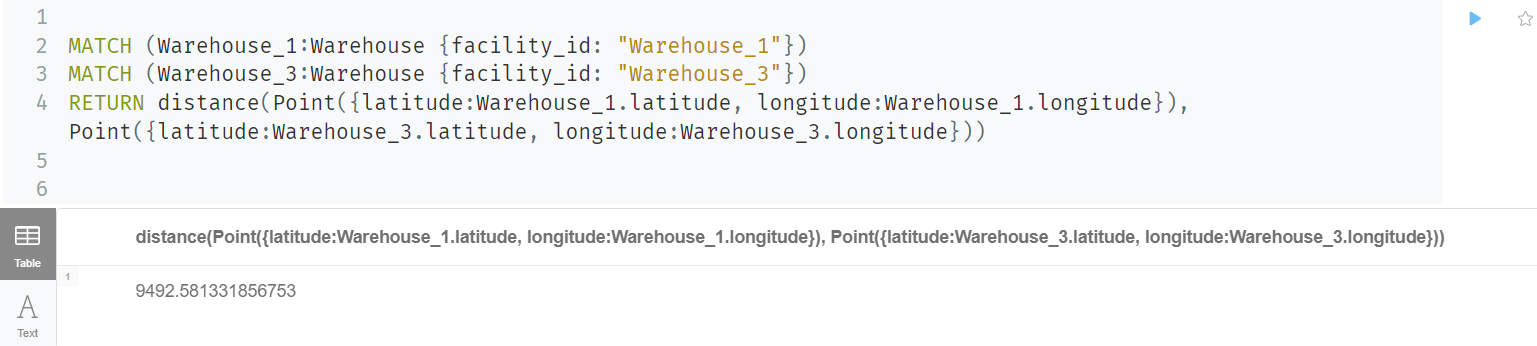

I would say that warehouse 3 is the best option for offloading the warehouse_1 as it is less distance away than 5 and it also has very low expectations for returned packages.

<div class="alert alert-block alert-warning">
    
## ADD YOUR Neo4j/Cypher CODE and OUTPUT HERE 
- MATCH (Warehouse_4:Warehouse {facility_id: "Warehouse_4"})
- MATCH (Warehouse_5:Warehouse {facility_id: "Warehouse_5"})
- RETURN distance(Point({latitude:Warehouse_4.latitude, longitude:Warehouse_4.longitude}), Point({latitude:Warehouse_5.latitude, longitude:Warehouse_5.longitude}))


    
    

</div>


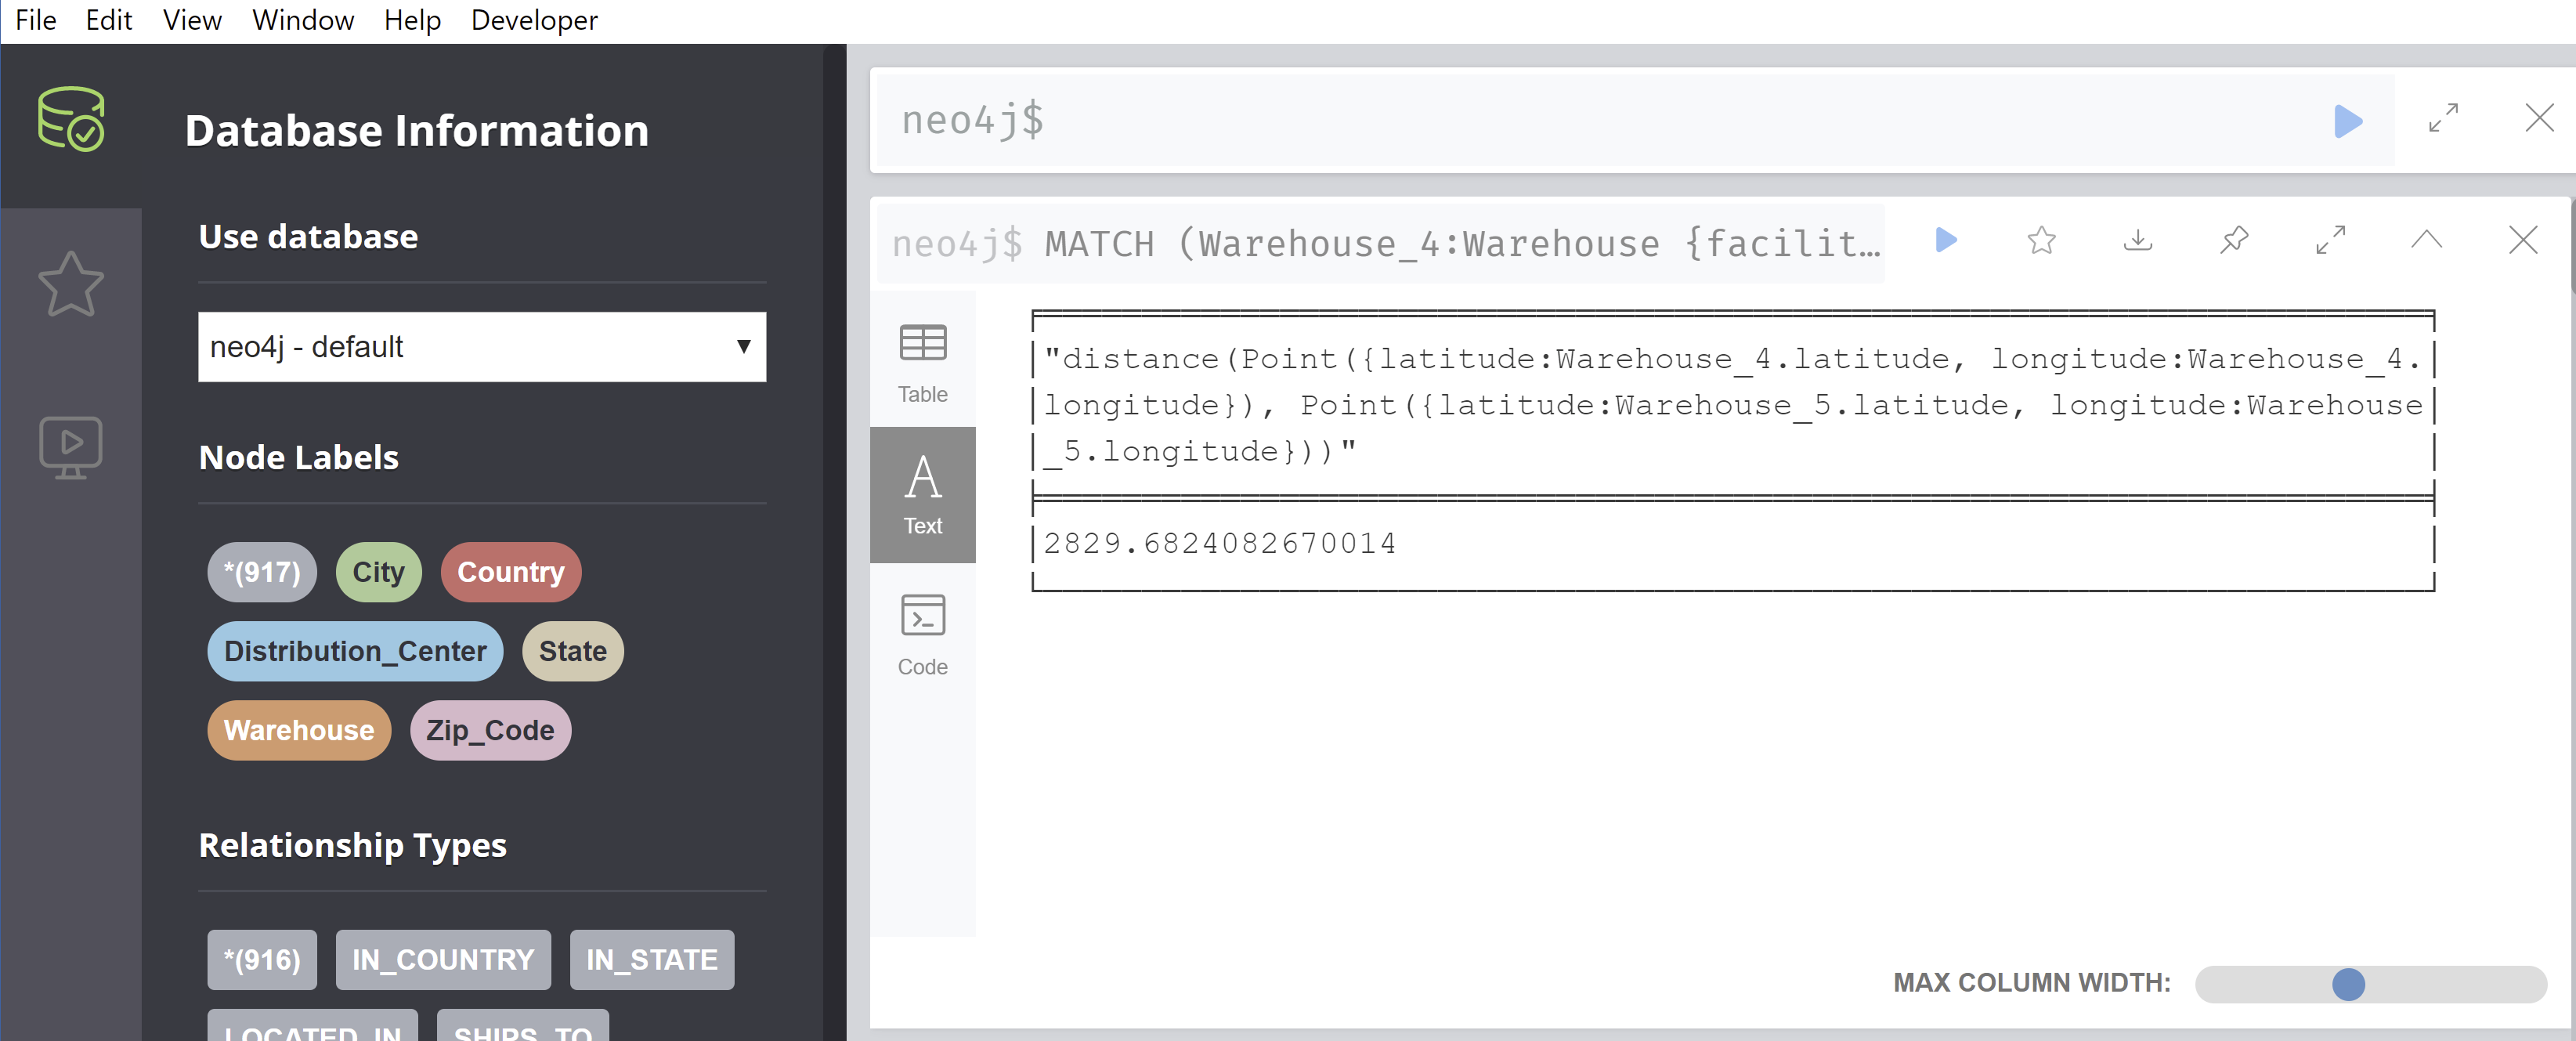


<div class="alert alert-info">   
    
## Requirement #10
### To offload the busiest distribution center with highest number of delayed deliveries, identify the distribution center that has the forecast for the highest number of delayed deliveries, and find its nearest neighboring distribution center that has the lowest number of delayed deliveries (consider 1-20 miles radius)
    
        - After you identify the busiest distribution center with highest number of delayed deliveries and the delayed deliveries for every distribution center
        - Use Neo4j to calculate the distance of the nearest neighbor
        - You must submit your cypher code and output from Neo4j in the MARKEDDOWN cell below

    
</div>

In [66]:
# ADD YOUR Python CODE HERE
df12=df7.groupby('distcenter')['Order_Delivered_on_Time'].count()
df12=df12.to_frame()
df12.sort_values("Order_Delivered_on_Time",ascending=False)




Order_Delivered_on_Time
distcenter                                    
DistributionCenter_2                       255
DistributionCenter_65                      204
DistributionCenter_13                      180
DistributionCenter_51                      174
DistributionCenter_37                      168
DistributionCenter_38                      119
DistributionCenter_85                       79
DistributionCenter_66                       77
DistributionCenter_93                       66
DistributionCenter_50                       52
DistributionCenter_14                       37
DistributionCenter_86                       21
DistributionCenter_84                       13

<div class="alert alert-block alert-warning">
    
## ADD YOUR Neo4j/Cypher CODE and OUTPUT HERE 
- MATCH (Warehouse_4:Warehouse {facility_id: "Warehouse_4"})
- MATCH (Warehouse_5:Warehouse {facility_id: "Warehouse_5"})
- RETURN distance(Point({latitude:Warehouse_4.latitude, longitude:Warehouse_4.longitude}), Point({latitude:Warehouse_5.latitude, longitude:Warehouse_5.longitude}))


    
    

</div>


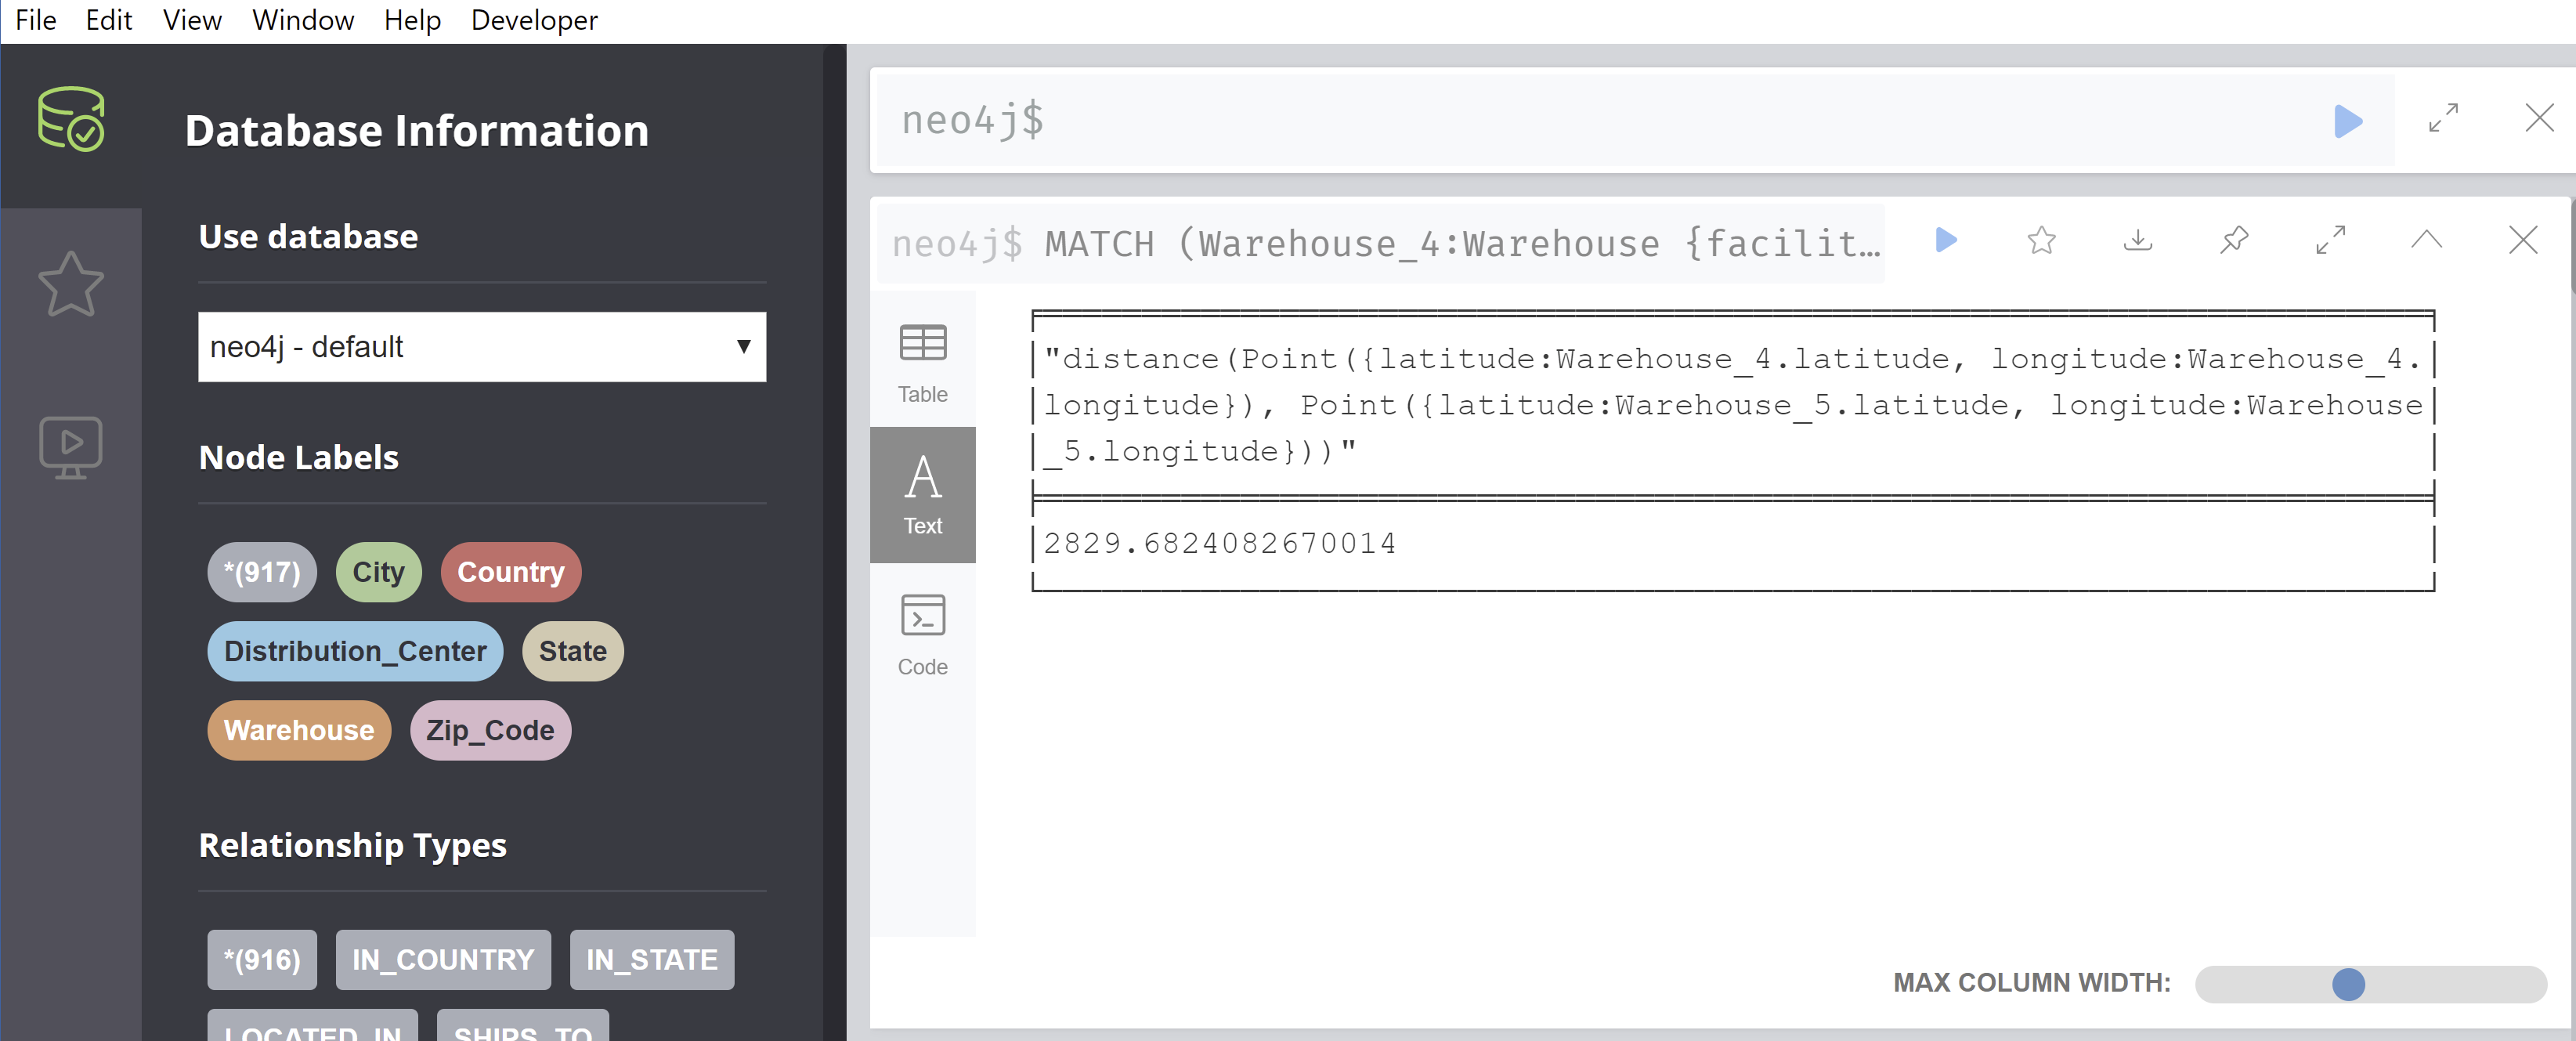


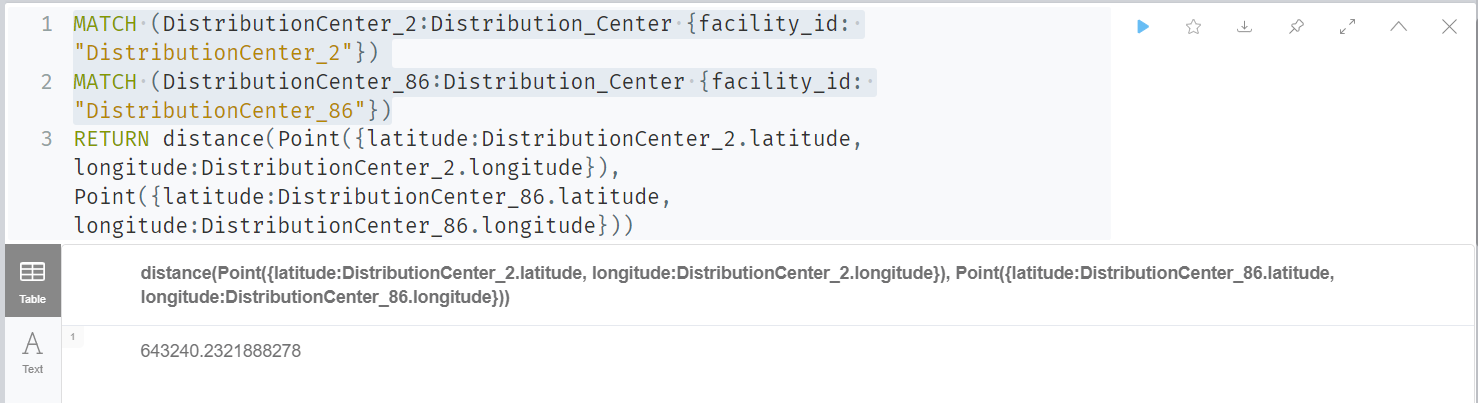